**Dimensionality Reduction using data bricks - Movies dataset**

**Loading and Initial Exploration**

In [2]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Load the dataset
file_path = 'movies.csv'
movies_df = pd.read_csv(file_path)

# Display basic information about the dataset
movies_info = movies_df.info()
movies_head = movies_df.head()

movies_info, movies_head

Saving movies.csv to movies.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


(None,
    movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|Children|Fantasy  
 2                               Comedy|Romance  
 3                         Comedy|Drama|Romance  
 4                                       Comedy  )

**Data Cleaning and Preprocessing**

In [3]:
# Checking for missing values
missing_values = movies_df.isnull().sum()

# Extracting year from the title and creating a new column
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)')
movies_df['title'] = movies_df['title'].str.replace(r'\(\d{4}\)', '').str.strip()

# Transforming the genres column using one-hot encoding
genres_expanded = movies_df['genres'].str.get_dummies(sep='|')

# Merging the one-hot encoded genres back to the original dataframe
movies_df_transformed = pd.concat([movies_df, genres_expanded], axis=1)

missing_values, movies_df_transformed.head()

<ipython-input-3-6dc33f13c783>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  movies_df['title'] = movies_df['title'].str.replace(r'\(\d{4}\)', '').str.strip()


(movieId    0
 title      0
 genres     0
 dtype: int64,
    movieId                        title  \
 0        1                    Toy Story   
 1        2                      Jumanji   
 2        3             Grumpier Old Men   
 3        4            Waiting to Exhale   
 4        5  Father of the Bride Part II   
 
                                         genres  year  (no genres listed)  \
 0  Adventure|Animation|Children|Comedy|Fantasy  1995                   0   
 1                   Adventure|Children|Fantasy  1995                   0   
 2                               Comedy|Romance  1995                   0   
 3                         Comedy|Drama|Romance  1995                   0   
 4                                       Comedy  1995                   0   
 
    Action  Adventure  Animation  Children  Comedy  ...  Film-Noir  Horror  \
 0       0          1          1         1       1  ...          0       0   
 1       0          1          0         1       0  ...  

**Exploratory Data Analysis (EDA) phase**

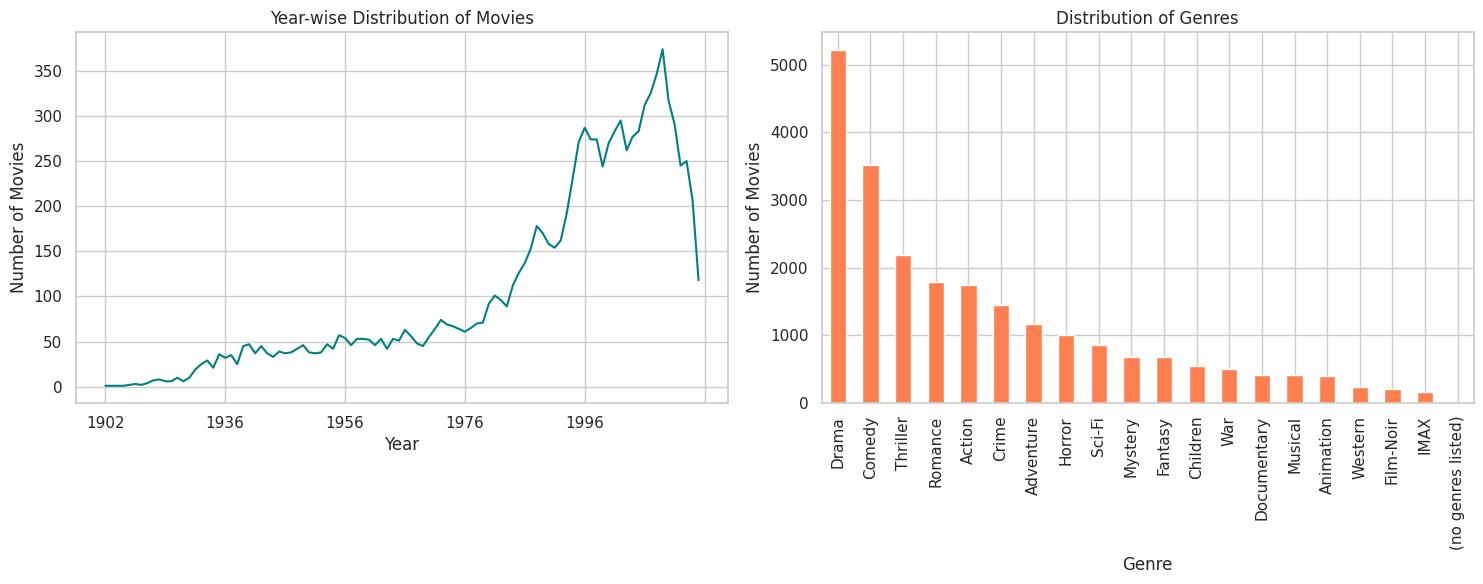

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Year-wise Distribution of Movies
movies_by_year = movies_df_transformed['year'].value_counts().sort_index()

# Genre Analysis
# Dropping columns not related to genres for this analysis
genre_counts = movies_df_transformed.drop(columns=['movieId', 'title', 'genres', 'year']).sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(15, 6))

# Year-wise distribution plot
plt.subplot(1, 2, 1)
movies_by_year.plot(kind='line', color='teal')
plt.title('Year-wise Distribution of Movies')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Genre distribution plot
plt.subplot(1, 2, 2)
genre_counts.plot(kind='bar', color='coral')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')

plt.tight_layout()
plt.show()

**Dimensionality Reduction phase**

**Principal Component Analysis (PCA)**

In [5]:
from sklearn.decomposition import PCA
import numpy as np

# Selecting the numerical features (genre indicators) for PCA
features = movies_df_transformed.drop(columns=['movieId', 'title', 'genres', 'year'])

# Applying PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(features)

# The amount of variance that each PCA explains
explained_variance = pca.explained_variance_ratio_

# Number of components
n_components = pca.n_components_

explained_variance, n_components, principal_components.shape

(array([0.19327511, 0.16465967, 0.09702815, 0.08550984, 0.07515191,
        0.05640252, 0.05397752, 0.04085628, 0.03678241, 0.03233622,
        0.03129311, 0.02612711, 0.02488603, 0.02055419, 0.01760738]),
 15,
 (10329, 15))

**t-Distributed Stochastic Neighbor Embedding (t-SNE)**

In [6]:
from sklearn.manifold import TSNE

# Applying t-SNE to the PCA-transformed data
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(principal_components)

# Converting the results to a DataFrame for easier plotting
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

tsne_df.head()

,TSNE1,TSNE2
0,52.325527,9.374654
1,45.756004,0.929188
2,34.173878,-44.970310
3,15.393441,-84.485123
4,8.000053,-32.301441


In [7]:
# Taking a random sample of the PCA-transformed data
sample_size = 1000  # Sample size
pca_sample = principal_components[np.random.choice(principal_components.shape[0], sample_size, replace=False)]

# Applying t-SNE to the sampled data
tsne_sample = TSNE(n_components=2, random_state=42)
tsne_sample_results = tsne_sample.fit_transform(pca_sample)

# Converting the results to a DataFrame for easier plotting
tsne_sample_df = pd.DataFrame(tsne_sample_results, columns=['TSNE1', 'TSNE2'])

tsne_sample_df.head()

,TSNE1,TSNE2
0,25.253386,-75.834908
1,-140.573639,48.486115
2,61.206390,68.499588
3,96.659538,-10.065421
4,-112.698875,10.137792


**Visualizing PCA Components**

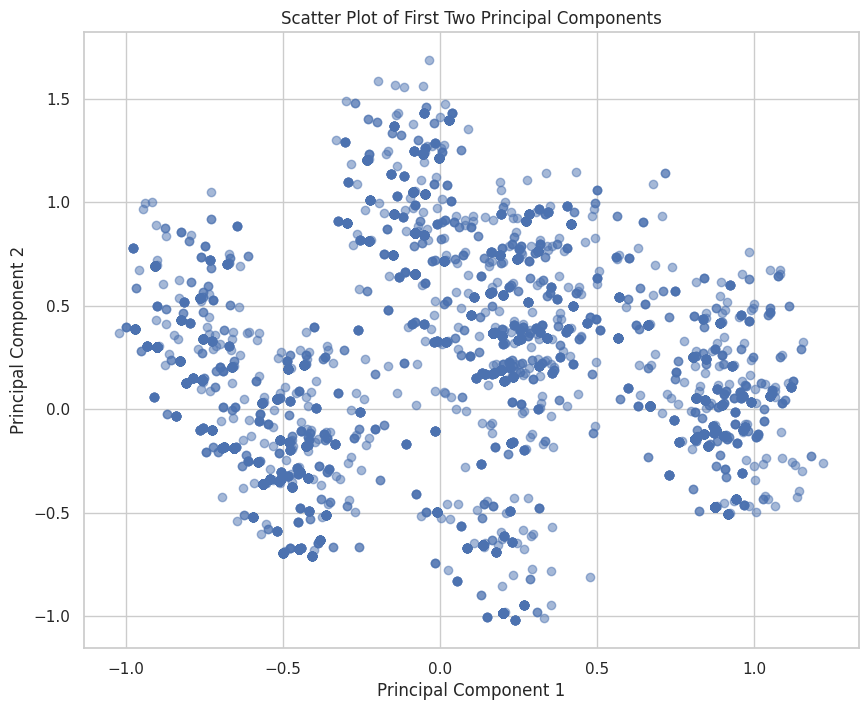

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
(no genres listed),0.000339,0.000409,0.000630,-0.002003,-0.000430,-0.002585,-0.000790,-0.001681,-0.000653,-0.000086,0.000257,-0.000783,-0.000448,-0.001515,-0.005731
Action,-0.006077,0.392547,0.293181,0.605062,0.056964,0.053379,-0.463326,0.017575,0.281399,0.200548,0.070405,0.077368,-0.177561,-0.002882,0.077819
Adventure,0.085618,0.164768,0.455375,0.235031,0.052478,0.166450,0.481004,-0.012422,-0.036066,-0.641438,0.066243,-0.067093,-0.034683,0.109156,0.062493
Animation,0.060141,0.029683,0.127130,0.011734,-0.023773,0.002117,0.265475,0.034299,-0.014057,0.288826,-0.137892,0.366734,-0.053795,-0.150939,0.139706
Children,0.091904,0.012254,0.146812,-0.005512,-0.067973,0.021578,0.403355,-0.037624,0.044611,0.289612,-0.179682,0.477345,-0.109967,-0.257147,0.088444


In [8]:
# Visualizing the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.title('Scatter Plot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Analyzing component loadings for the first two components
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_components)], index=features.columns)
loadings.head()

**Visualize the results of the t-SNE analysis**

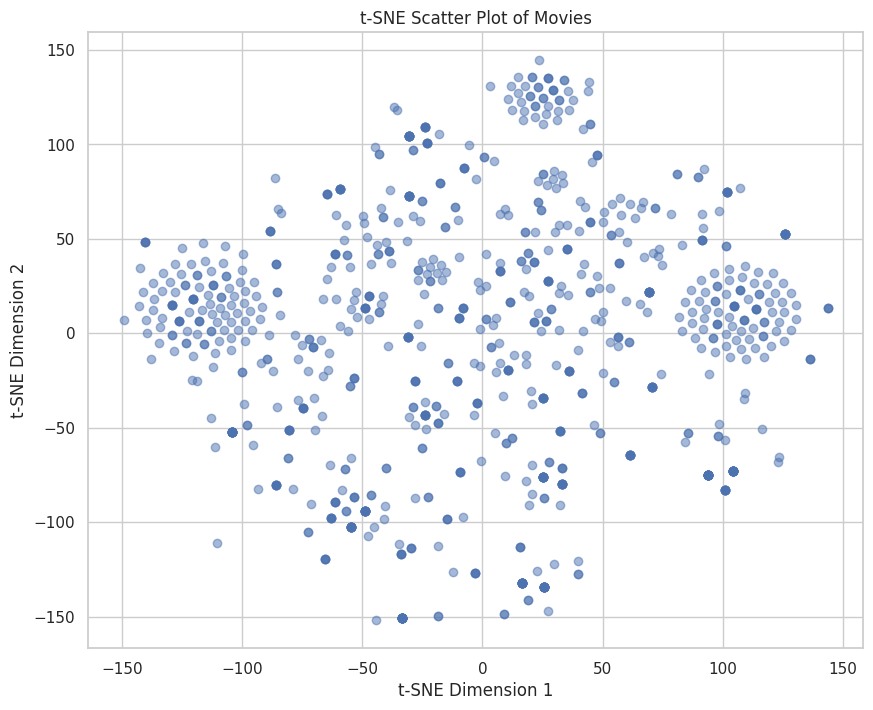

In [9]:
# Creating a scatter plot for the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_sample_df['TSNE1'], tsne_sample_df['TSNE2'], alpha=0.5)
plt.title('t-SNE Scatter Plot of Movies')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

**Clustering**

**Determining appropriate number of clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

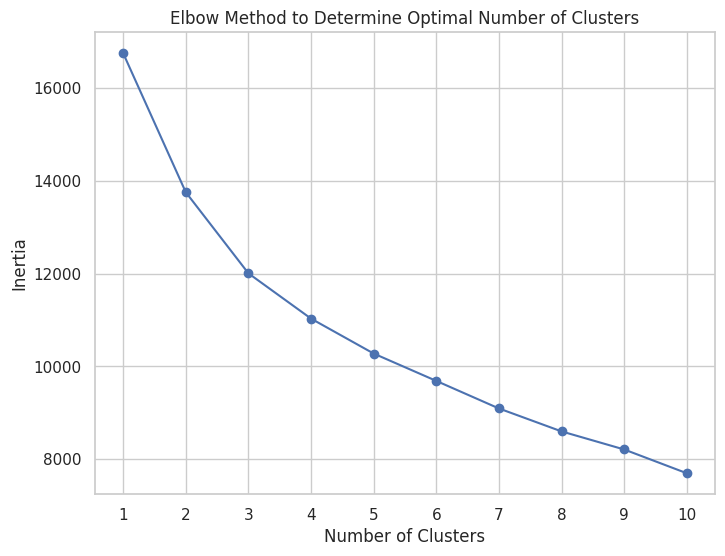

In [10]:
from sklearn.cluster import KMeans
import numpy as np

# Applying the elbow method to determine the optimal number of clusters
inertia = []
k_range = range(1, 11)  # Testing 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

# Plotting the elbow method results
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

**Applying K-means clustering using the identified number of clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


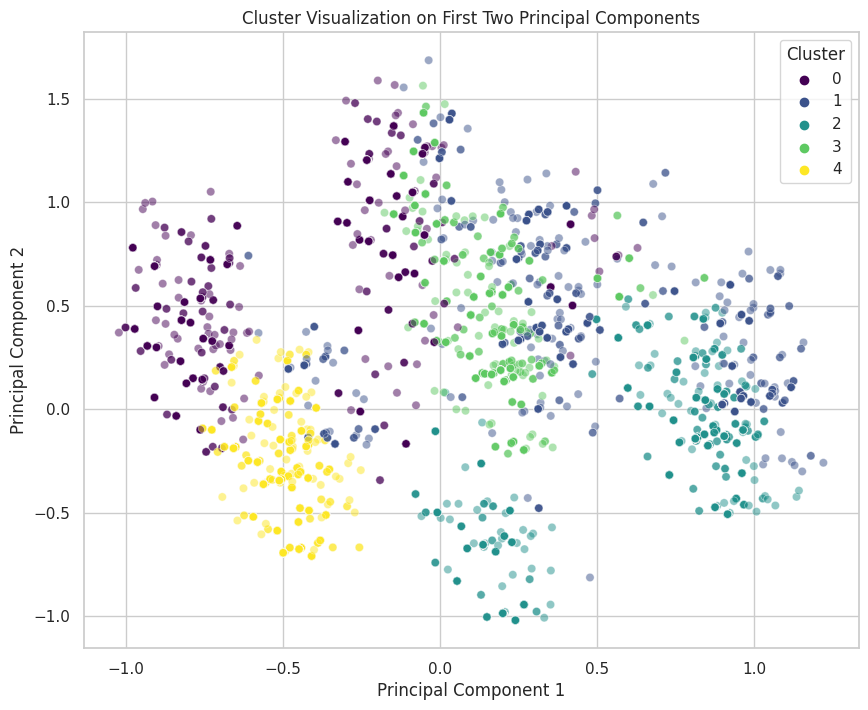

4    3103
2    3072
0    1681
3    1515
1     958
Name: cluster, dtype: int64

In [11]:
# Based on the elbow plot, let's choose 5 clusters for K-means clustering
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(principal_components)

# Adding the cluster labels to our dataset
movies_df_transformed['cluster'] = kmeans.labels_

# Checking the distribution of movies across the clusters
cluster_distribution = movies_df_transformed['cluster'].value_counts()

# Now let's visualize the clusters in the context of the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=kmeans.labels_, palette='viridis', alpha=0.5)
plt.title('Cluster Visualization on First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

cluster_distribution

**Cluster analysis**

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(principal_components)

# Step 4: Attach the cluster labels to the original dataframe
movies_df['cluster'] = clusters

# Step 5: Characterize clusters by calculating the mean of the features for each cluster
cluster_characteristics = movies_df.groupby('cluster').mean()

# Step 6: Interpret clusters by reviewing movies in each cluster
# (This step would involve domain knowledge and manual review of the movies in each cluster)

print(cluster_characteristics)  # This will print the average feature values for each cluster

# To get movie titles in each cluster for interpretation:
for i in range(5):  # Assuming 5 clusters
    print(f"Cluster {i} movies:")
    print(movies_df[movies_df['cluster'] == i]['title'].head())  # Replace 'head()' with 'sample(n)' for random movies

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


              movieId
cluster              
0        37388.129685
1        32390.241127
2        28329.880859
3        35208.497690
4        30775.492427
Cluster 0 movies:
5            Heat
19    Money Train
20     Get Shorty
21        Copycat
22      Assassins
Name: title, dtype: object
Cluster 1 movies:
0        Toy Story
1          Jumanji
7     Tom and Huck
9        GoldenEye
12           Balto
Name: title, dtype: object
Cluster 2 movies:
2                Grumpier Old Men
3               Waiting to Exhale
4     Father of the Bride Part II
6                         Sabrina
10        American President, The
Name: title, dtype: object
Cluster 3 movies:
8               Sudden Death
64       From Dusk Till Dawn
65                 Fair Game
97                   Catwalk
104    Anne Frank Remembered
Name: title, dtype: object
Cluster 4 movies:
13                    Nixon
15                   Casino
16    Sense and Sensibility
23                   Powder
24        Leaving Las Vegas
Name: ti

<ipython-input-13-fbb7ff542019>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_characteristics = movies_df.groupby('cluster').mean()
